In [4]:
import numpy as np  
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score
%matplotlib inline

In [5]:
dataset = pd.read_csv('housing.csv')

In [6]:
dataset.shape

(20640, 10)

In [7]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


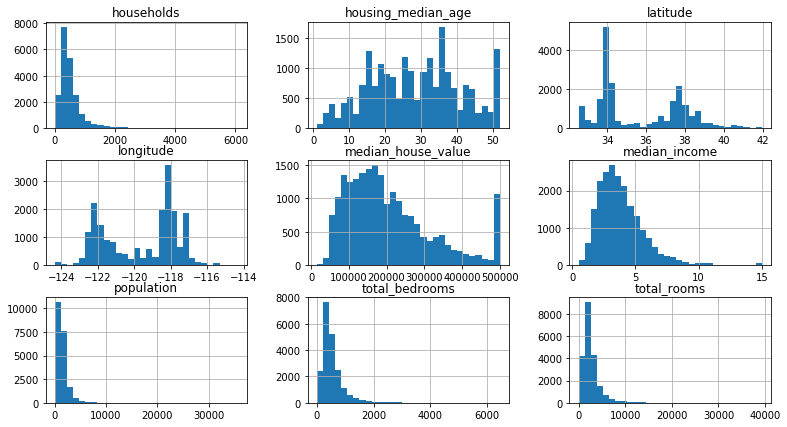

In [9]:
dataset.hist(bins=30, figsize=(13,7))
plt.show()

In [10]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

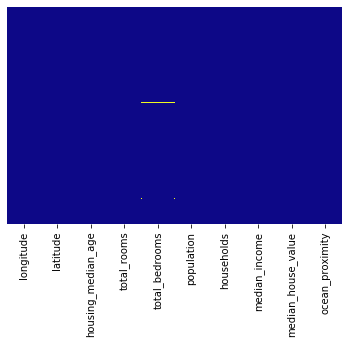

In [11]:
dataset.isnull().sum()
sns.heatmap(dataset.isnull(),cmap='plasma',cbar=False,yticklabels=False)

In [12]:
dataset["total_bedrooms"].fillna( method ='ffill', inplace = True)
dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

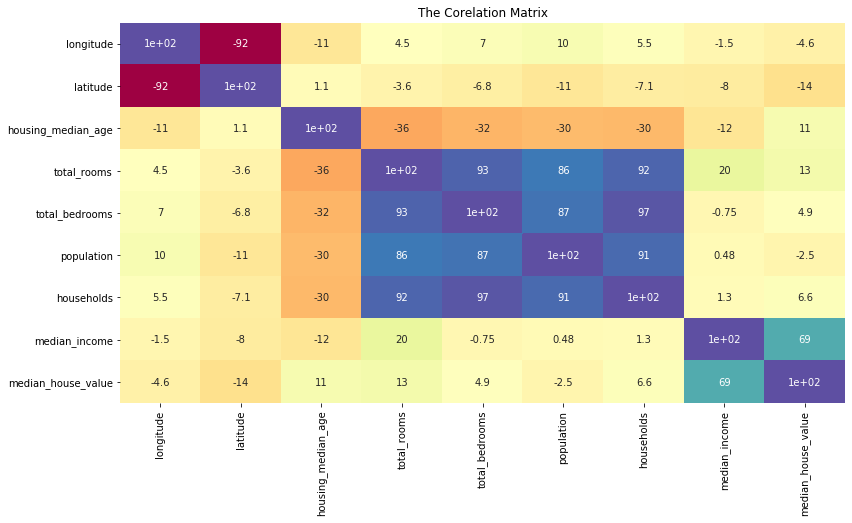

In [13]:
plt.figure(figsize=(13,7))
sns.heatmap(cbar=False,annot=True,data=dataset.corr()*100,cmap='Spectral')
plt.title('The Corelation Matrix')
plt.show()

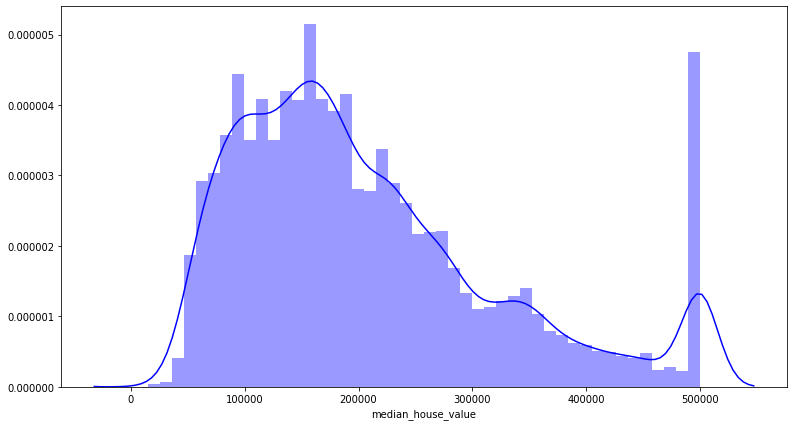

In [14]:
plt.figure(figsize=(13,7))
sns.distplot(dataset['median_house_value'],color='blue')
plt.show()

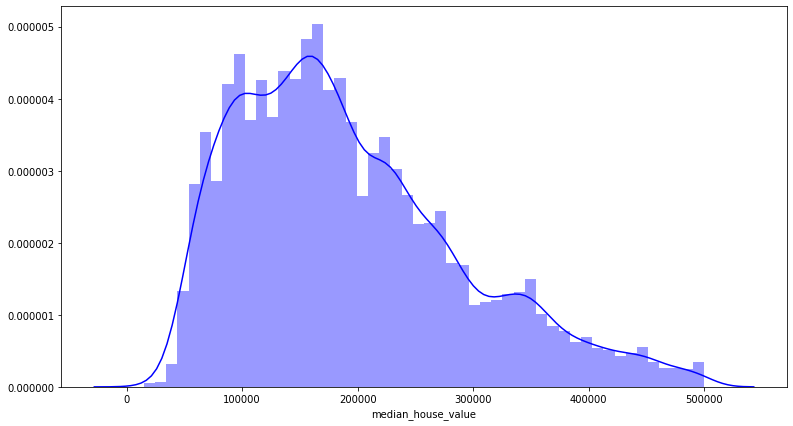

In [15]:
dataset[dataset['median_house_value']>450000]['median_house_value'].value_counts().head()
dataset=dataset.loc[dataset['median_house_value']<500001,:]
plt.figure(figsize=(13,7))
sns.distplot(dataset['median_house_value'],color='blue')
plt.show()

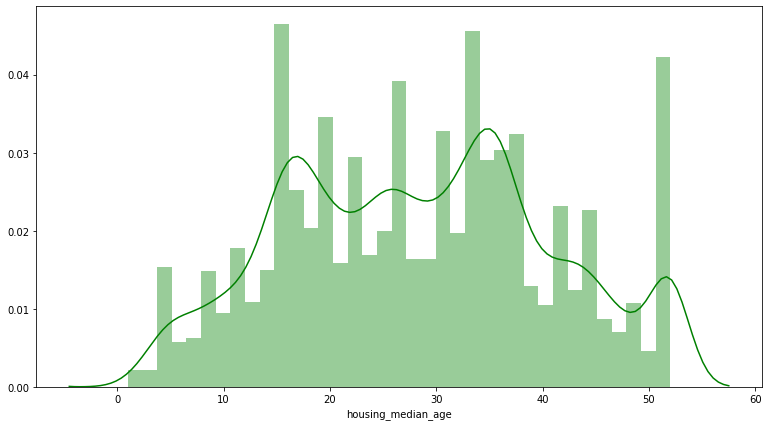

In [16]:
plt.figure(figsize=(13,7))
sns.distplot(dataset['housing_median_age'],color='green')
plt.show()

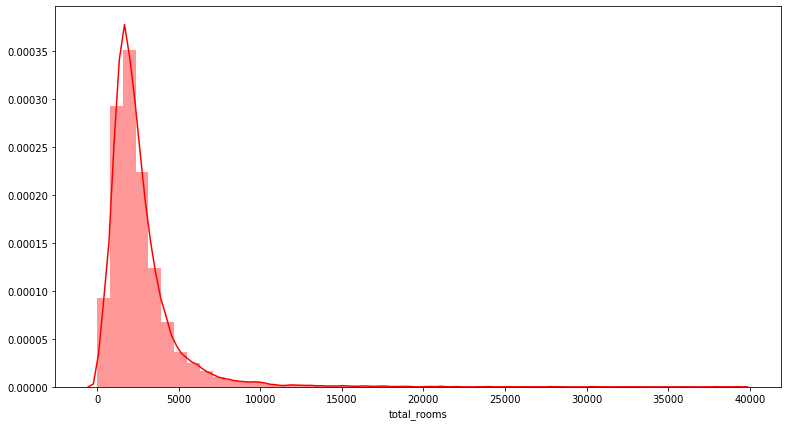

In [17]:
plt.figure(figsize=(13,7))
sns.distplot(dataset['total_rooms'],color='red')
plt.show()

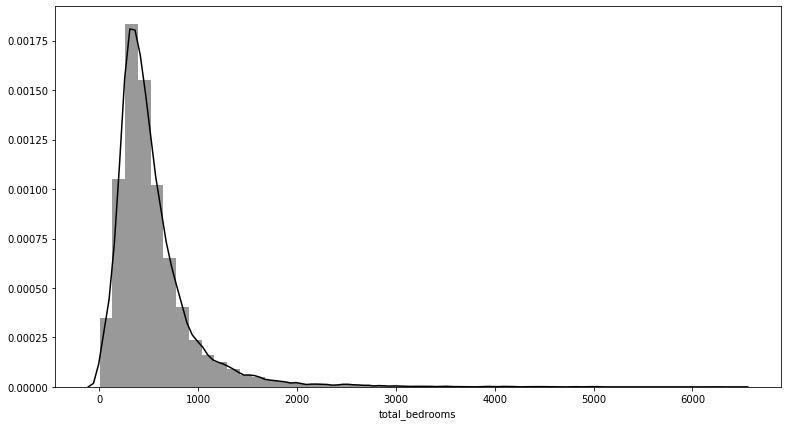

In [18]:
plt.figure(figsize=(13,7))
sns.distplot(dataset['total_bedrooms'],color='black')
plt.show()

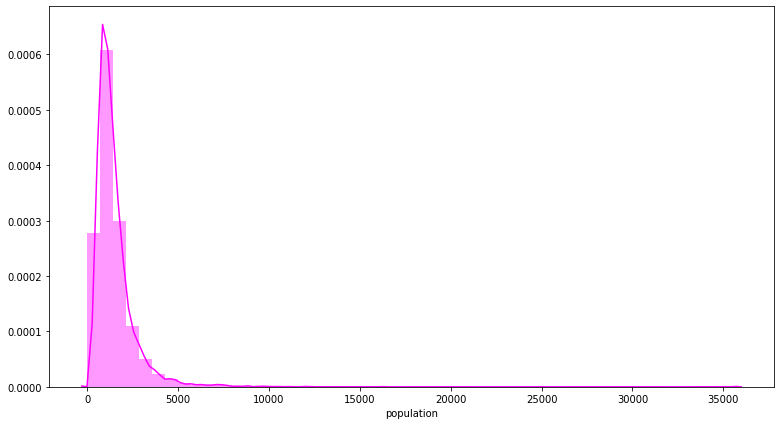

In [19]:
plt.figure(figsize=(13,7))
sns.distplot(dataset['population'],color='magenta')
plt.show()

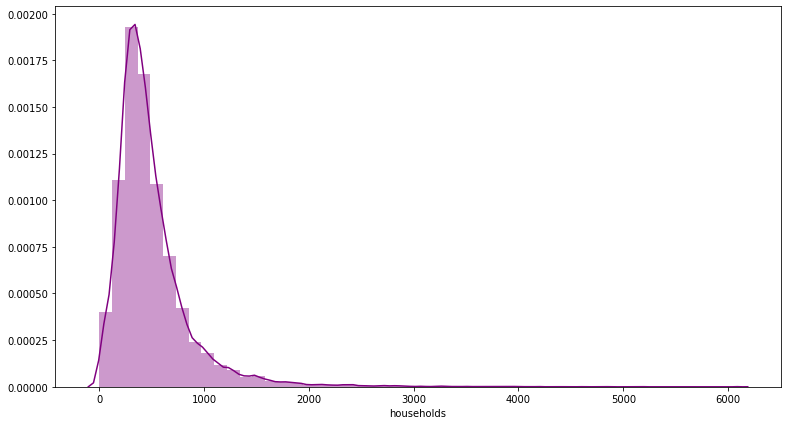

In [20]:
plt.figure(figsize=(13,7))
sns.distplot(dataset['households'],color='purple')
plt.show()

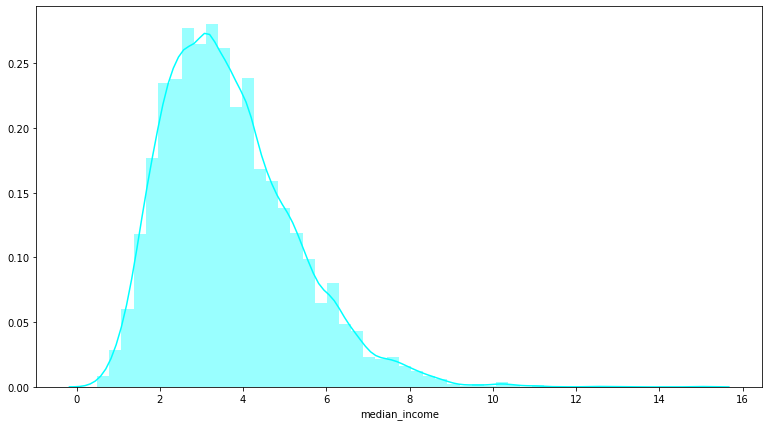

In [21]:
plt.figure(figsize=(13,7))
sns.distplot(dataset['median_income'],color='cyan')
plt.show()

[]

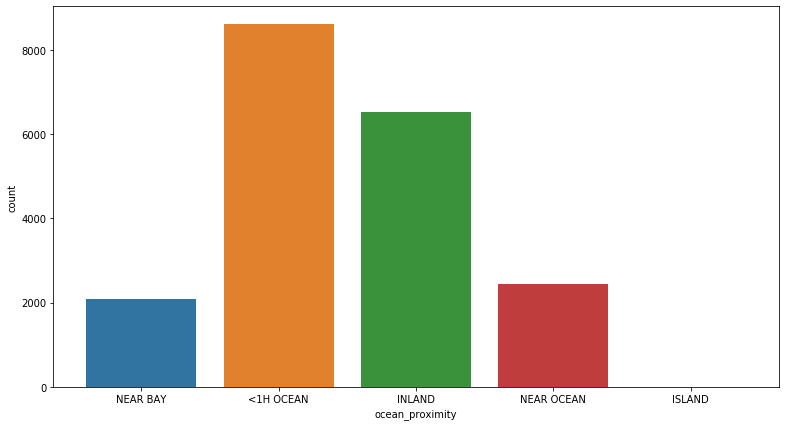

In [22]:
plt.figure(figsize=(13,7))
sns.countplot(data=dataset,x='ocean_proximity')
plt.plot()

In [23]:
dataset=pd.concat([pd.get_dummies(dataset['ocean_proximity'],drop_first=True),dataset],axis=1).drop('ocean_proximity',axis=1)
dataset['income per working population']=dataset['median_income']/(dataset['population']-dataset['households'])
dataset['bed per house']=dataset['total_bedrooms']/dataset['total_rooms']
dataset['h/p']=dataset['households']/dataset['population']

In [24]:
def getdummies(x):
    if x<=10:
        return "new"
    elif x<=30:
        return 'mid old'
    else:
        return 'old'
dataset=pd.concat([dataset,pd.get_dummies(dataset['housing_median_age'].apply(getdummies),drop_first=True)],axis=1)

In [25]:
x=dataset.drop('median_house_value',axis=1).values
y=dataset['median_house_value'].values
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
def regresssor_model(x,y,estimator):
   
    regressor=estimator()
    regressor.fit(x,y)
    regcv=cross_val_score(cv=7,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy= '+str(100*regcv.mean()))
    print('The corss validated variance= '+str(100*regcv.std()))
    return regressor

In [27]:
def evaluate(y_pred,y_test,regressor):
    plt.figure(figsize=(13,7))
    plt.xlabel('(y_test) - (y_pred)')
    plt.ylabel('Frequency')
    plt.title('Residual Plot')
    plt.hist(y_test-y_pred)
    print("Root Mean Squared Error for test data= "+str(np.sqrt(mean_squared_error(y_test,y_pred))))
    plt.show()

In [28]:
def to_poly(degree,X_train,X_test):
    poly=PolynomialFeatures(degree=degree)
    xr=poly.fit_transform(X_train)
    xs=poly.fit_transform(X_test)
    return (xr,xs)

Linear regression with the co-related features
The cross validated accuracy= 41.85174057579531
The corss validated variance= 1.7944890110601273
Root Mean Squared Error for test data= 75710.87814279893


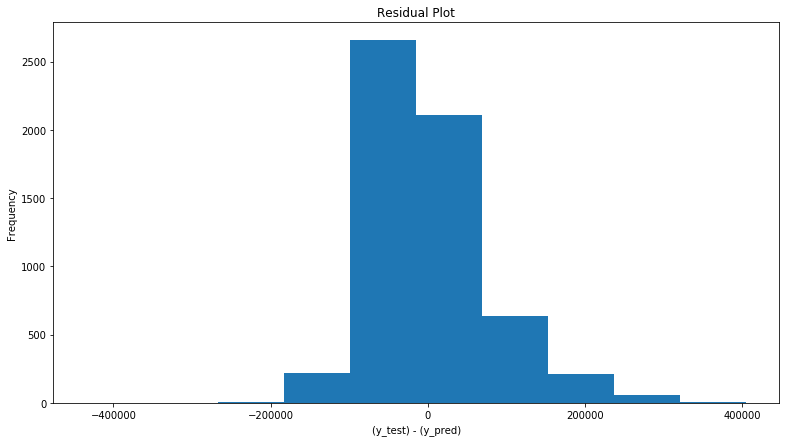

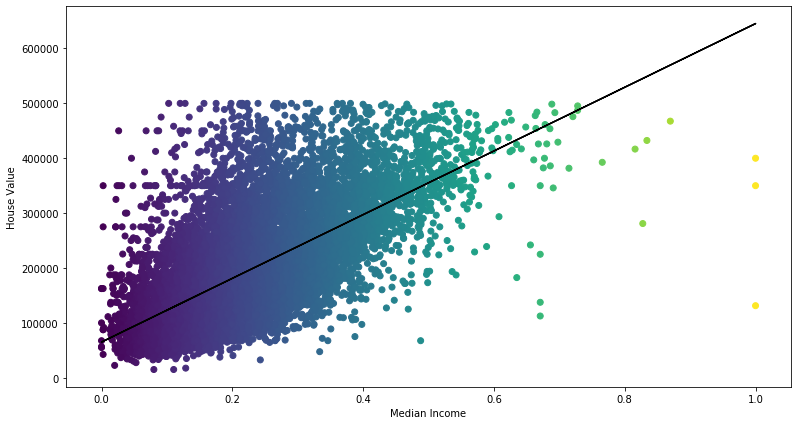

In [29]:
print('Linear regression with the co-related features')
l=regresssor_model(X_train[:,[11]],y_train,LinearRegression)
evaluate(l.predict(X_test[:,[11]]),y_test,l)
plt.figure(figsize=(13,7))
plt.scatter(X_train[:,11],y_train,c=X_train[:,11])
plt.plot(X_train[:,11],l.predict(X_train[:,11:12]),color='black')
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.show()

[Text(167.4, 195.696, 'X[11] <= 0.246\nentropy = 9543122847.828\nsamples = 13772\nvalue = 193109.686'),
 Text(83.7, 152.208, 'X[0] <= 0.5\nentropy = 6243852436.137\nsamples = 8863\nvalue = 155215.717'),
 Text(41.85, 108.72, 'X[14] <= 0.276\nentropy = 6046884870.108\nsamples = 5329\nvalue = 189410.133'),
 Text(20.925, 65.232, 'X[11] <= 0.142\nentropy = 3503341150.592\nsamples = 3499\nvalue = 168249.328'),
 Text(10.4625, 21.744, 'entropy = 3279225304.395\nsamples = 1329\nvalue = 143646.877'),
 Text(31.387500000000003, 21.744, 'entropy = 3042867607.979\nsamples = 2170\nvalue = 183316.912'),
 Text(62.775000000000006, 65.232, 'X[11] <= 0.167\nentropy = 8417026316.39\nsamples = 1830\nvalue = 229870.055'),
 Text(52.3125, 21.744, 'entropy = 6801841135.821\nsamples = 793\nvalue = 192434.048'),
 Text(73.2375, 21.744, 'entropy = 7760931614.246\nsamples = 1037\nvalue = 258497.589'),
 Text(125.55000000000001, 108.72, 'X[11] <= 0.166\nentropy = 2119016749.892\nsamples = 3534\nvalue = 103653.169'),
 

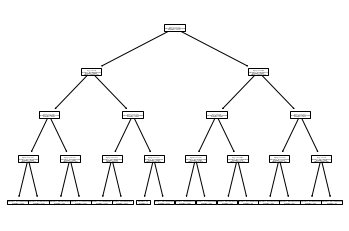

In [30]:
DT= DecisionTreeRegressor(criterion='mse', splitter ='best', random_state=130, max_depth=4, min_samples_leaf=1)
DT.fit(X_train, y_train)
tree.plot_tree(DT)

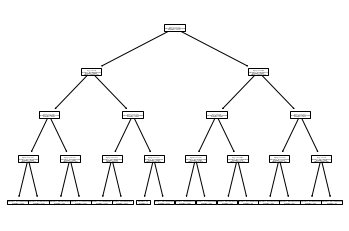

In [31]:
tree.plot_tree(DT)
plt.savefig('DecisionTreeRegressor.png')

In [32]:
y_pred= DT.predict(X_test)
print(y_pred)
print(y_test)

[227681.65359083 127049.25595238 192434.04791929 ... 266482.29376258
 258497.58919961 296386.159601  ]
[232000. 137800. 187500. ... 279400.  81300. 252100.]


In [33]:
mse= mean_squared_error(y_pred, y_test)
rmse= np.sqrt(mse)
print("Root mean squared error=",rmse)

Root mean squared error= 64313.6619759692


In [34]:
x.reshape(-1,1)
y.reshape(-1,1)
scores = cross_val_score(estimator=DT, X=x, y=y, cv=7)
print (scores)

[0.39600645 0.55866721 0.37168424 0.51527465 0.32726169 0.41113065
 0.67147706]


In [48]:
cv=cross_val_score(estimator=DT, X=x, y=y, cv=21,scoring='r2')
print (cv.std())
print (cv.mean())

0.3900660004771901
0.33783685750007664


In [49]:
params=[{
            
            'max_depth':[2,3,4,5,6,10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
            
        }
        ]

from sklearn.model_selection import GridSearchCV
gc=GridSearchCV(DT,params,cv=10,scoring='r2',n_jobs=-1)
gc.fit(x_train,y_train)
gc.best_estimator_

NameError: name 'x_train' is not defined

In [ ]:
gc.best_score_

In [ ]:
DT=gc.best_estimator_
DT.fit(x_train,y_train)
print('root mean squared error')
np.sqrt(mean_squared_error(y_test,DT.predict(x_test)))

In [ ]:
plt.figure(figsize=(12,8))
data=pd.DataFrame({'feature':df.columns[df.columns!='median_house_value'].values,"importance":dt.feature_importances_})
sns.barplot(data=data,y='feature',x='importance')
plt.title('feature importance')